In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import dgl
import torch
import scipy.sparse as sp
import torch.nn as nn
from node2vec import Node2Vec
import pickle

/home/pintos/miniconda3/envs/DataScience/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
node_travel_data = None
node_information_data = None

# Read dictionary pkl file
with open('feature_selection_method1/node_travel_data.pkl', 'rb') as fp:
    node_travel_data = pickle.load(fp)
with open('feature_selection_method2/node_information_data.pkl', 'rb') as fp:
    node_information_data = pickle.load(fp)

In [5]:
print(node_travel_data['fc488e5949734a3198d955cf913324df695912a48a45c17d8d9da089e6c1a6f2'])
print(node_information_data['fc488e5949734a3198d955cf913324df695912a48a45c17d8d9da089e6c1a6f2'])

{'avg_locations_per_day': 1.4, 'avg_distance_per_day': 1.9341710782882113}
{'age': array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False]), 'gender': array([False,  True, False]), 'score': 152.01923613897137}


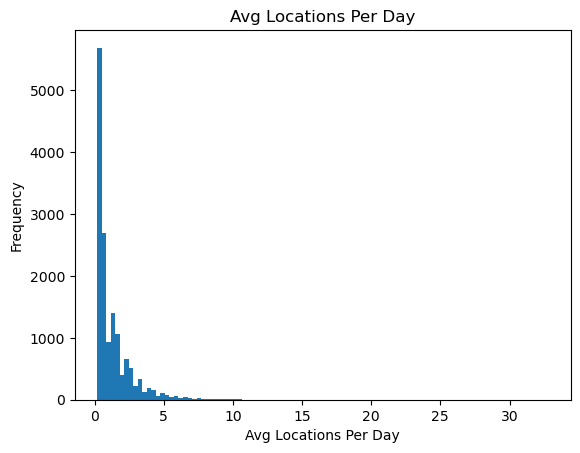

In [17]:
avg_locations_per_day = [node_travel_data[data]['avg_locations_per_day'] for data in node_travel_data]
avg_locations_per_day.sort()
# plot the histogram
plt.hist(avg_locations_per_day, bins=100)
plt.title('Avg Locations Per Day')
plt.xlabel('Avg Locations Per Day')
plt.ylabel('Frequency')
# plt.text(25, -30, f'Max Avg Locations Per Day {max(avg_locations_per_day)}', fontsize = 10) 
plt.show()

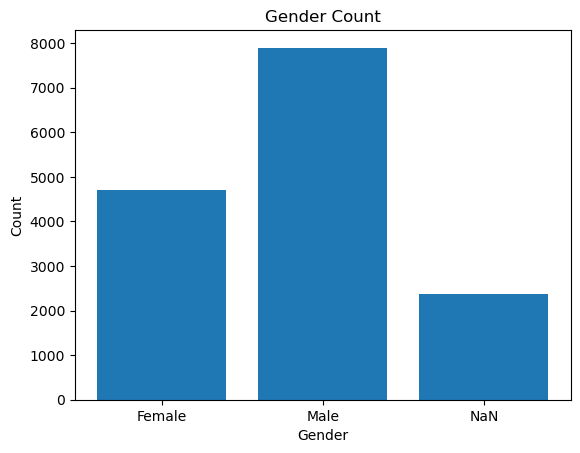

In [24]:
gender_count_data = [node_information_data[data]['gender'] for data in node_information_data]
gender_count = []
for data in gender_count_data:
    if data[0] == True or data[0] == 1:
        gender_count.append("Female")
    elif data[1] == True or data[0] == 1:
        gender_count.append("Male")
    else:
        gender_count.append("NaN")
gender_count_dict = {}
for gender in gender_count:
    if gender in gender_count_dict:
        gender_count_dict[gender] += 1
    else:
        gender_count_dict[gender] = 1

# PloT the bar chart
labels = ["Female", "Male", "NaN"]
values = [gender_count_dict["Female"], gender_count_dict["Male"], gender_count_dict["NaN"]]
plt.bar(labels, values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count")
plt.show()

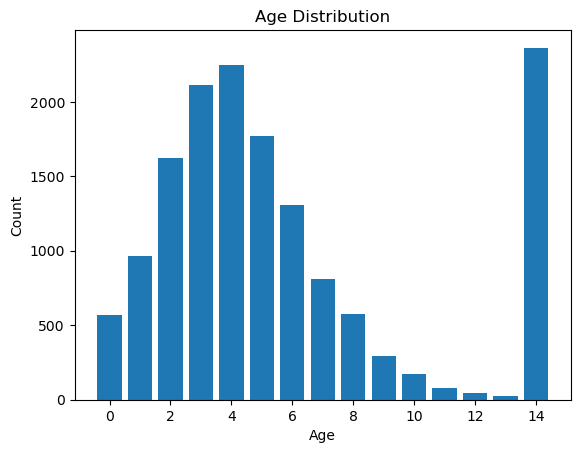

In [29]:
age_count_data = [node_information_data[data]['age'] for data in node_information_data]
age_count = []
for data in age_count_data:
    data = list(data)
    age_count.append(data.index(True))
age_count_dict = {}
for age in age_count:
    if age in age_count_dict:
        age_count_dict[age] += 1
    else:
        age_count_dict[age] = 1

# PloT the bar chart
labels = list(age_count_dict.keys())
labels.sort()
values = [age_count_dict[label] for label in labels]
label_values = []

plt.bar(labels, values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()